In [36]:
!pip install tensorflow
!pip install torch

In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [38]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [39]:
X_train_full.shape

(60000, 28, 28)

In [40]:
y_train_full.shape

(60000,)

In [41]:
print(X_test)
print(y_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[9 2 1 ... 8 1 5]


In [42]:
X_train_full.dtype

dtype('uint8')

In [43]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test / 255.

In [44]:
len(X_valid)

5000

In [45]:
len(X_train)

55000

In [46]:
len(y_valid)

5000

In [47]:
len(y_train)

55000

In [48]:
len(X_test)

10000

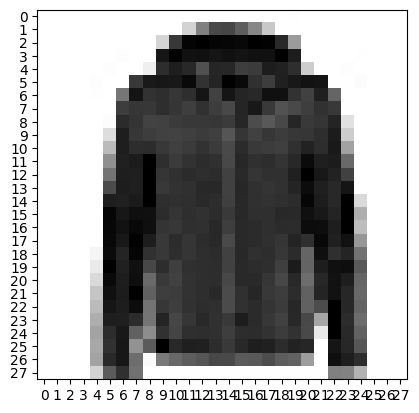

In [49]:
plt.imshow(X_train[0], cmap="binary", interpolation="nearest")
# plt.axis("off")
plt.xticks(range(28))
plt.yticks(range(28))
plt.show()

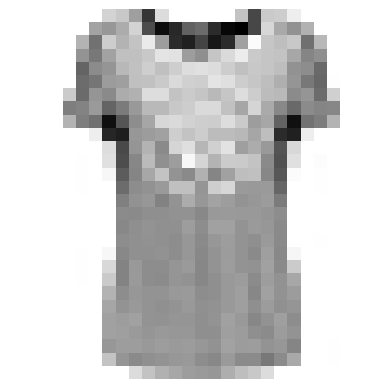

In [50]:
plt.imshow(X_train[1], cmap="binary")
plt.axis("off")
plt.show()

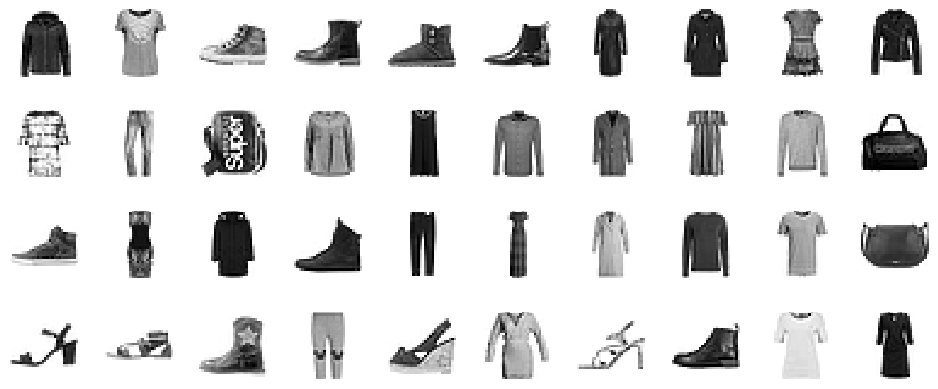

In [51]:
n_rows = 4
n_columns = 10

plt.figure(figsize=(n_columns*1.2, n_rows*1.2))
for row in range(n_rows):
    for column in range(n_columns):
        index = n_columns * row + column
        plt.subplot(n_rows, n_columns, index +1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        # plt.title(class_names[y_train[index]], fontsize = 12)
plt.subplots_adjust(wspace= 0.2, hspace=0.5)
plt.show()

In [52]:
import keras
from keras import layers
from keras import ops

In [53]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [55]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
!pip install pydot

In [62]:
# keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

from IPython.display import Image, display
display(keras.utils.plot_model(model, show_shapes=True))


You must install pydot (`pip install pydot`) for `plot_model` to work.


None

In [63]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [64]:
hidden2 = model.layers[2]
hidden2.name

'dense_1'

In [65]:
model.get_layer(hidden1.name) is hidden1
model.get_layer(hidden2.name) is hidden2

True

In [66]:
weights, biases = hidden1.get_weights()

In [67]:
weights

array([[-0.03803312, -0.05150807, -0.03854712, ...,  0.02625575,
         0.05336072,  0.0278245 ],
       [-0.04418304,  0.05034085, -0.00188702, ..., -0.0376961 ,
        -0.0003757 , -0.01837058],
       [ 0.03890458, -0.06582753,  0.06373972, ...,  0.0673935 ,
         0.05178615,  0.0045057 ],
       ...,
       [ 0.05816163, -0.01196698, -0.03889718, ...,  0.02833372,
        -0.04952081, -0.00805295],
       [ 0.01445162,  0.01804958, -0.02415874, ..., -0.01778947,
        -0.02521702, -0.00616711],
       [-0.06192084,  0.05772324,  0.05234836, ..., -0.05328685,
         0.05799277, -0.00379504]], shape=(784, 300), dtype=float32)

In [69]:
weights.shape

(784, 300)

In [68]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [70]:
biases.shape

(300,)

In [71]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [72]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy,
              optimizer= keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [73]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2026-01-15 09:45:46.235443: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7277 - sparse_categorical_accuracy: 0.7623 - val_loss: 0.5308 - val_sparse_categorical_accuracy: 0.8204
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4874 - sparse_categorical_accuracy: 0.8285 - val_loss: 0.4596 - val_sparse_categorical_accuracy: 0.8436
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4415 - sparse_categorical_accuracy: 0.8449 - val_loss: 0.4264 - val_sparse_categorical_accuracy: 0.8510
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4138 - sparse_categorical_accuracy: 0.8551 - val_loss: 0.4032 - val_sparse_categorical_accuracy: 0.8602
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.3940 - sparse_categorical_accuracy: 0.8621 - val_loss: 0.3876 - val_sparse_categorical_accuracy: 0.8638
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3782 - sparse_categorical_accuracy: 0.8671 - val_loss: 0.3755 - val_sparse_categorical_accuracy: 0.8670
Epo

In [74]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [75]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [76]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 51.8 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]2m1/2 [pandas]


<function matplotlib.pyplot.show(close=None, block=None)>

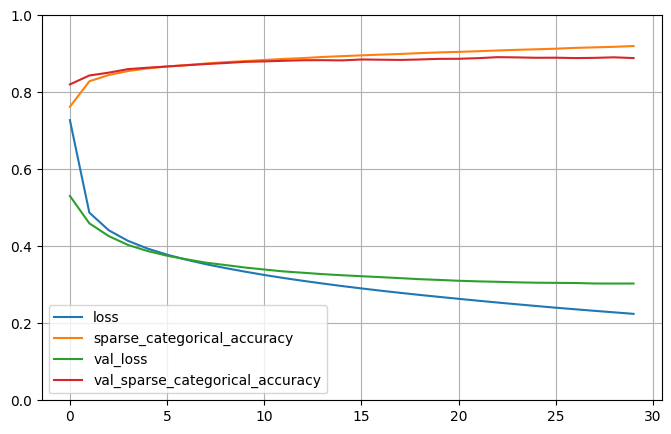

In [78]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize =(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [79]:
model.evaluate(X_test, y_test)

 26/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3604 - sparse_categorical_accuracy: 0.8731

2026-01-15 09:50:59.252763: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3502 - sparse_categorical_accuracy: 0.8754


[0.35021600127220154, 0.8754000067710876]